In [1]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.random import randn
from scipy.stats import shapiro, normaltest

In questo notebook, genereremo un insieme di dati gaussiani, li visualizzeremo a schermo, e verificheremo l'ipotesi di normalità mediante dei test integrati in SciPy.

# Generazione di dati Gaussiani

Scriviamo la funzione `generate_random_data` che restituisca una popolazione di dati che segua una distribuzione normale. La funzione deve avere tre parametri:

* `bias`, ovvero un valore per il quale sono moltiplicati tutti i campioni della popolazione;
* `offset`, ovvero un valore aggiunto a tutti i campioni della popolazione;
* `n_samples`, ovvero il numero di campioni generati.

I valori di default per `bias`, `offset` ed `n_samples` siano rispettivamente 5, 50 e 1000. Usiamo la funzione `randn` del package random di NumPy.

In [2]:
def generate_random_data(bias=5, offset=50, n_samples=1000):
    return bias * randn(n_samples) + offset

# Visualizzazione dei dati

Generiamo una popolazione di dati usando la funzione `generate_random_data`. Usiamo `matplotlib` per verificare che siano effettivamente disposti secondo una gaussiana.

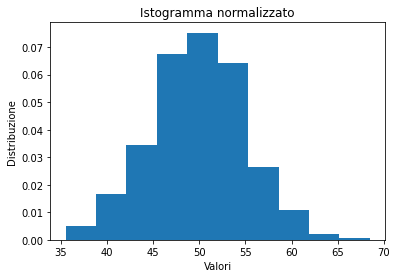

In [3]:
data = generate_random_data()

fig, ax = plt.subplots()

ax.hist(data, density=True)
ax.set_title('Istogramma normalizzato')
ax.set_xlabel('Valori')
ax.set_ylabel('Distribuzione')
plt.show()

# Test di Normalità

Un *test di normalità* è utile quando si vuole capire se un campione di dati appartiene o meno ad una distribuzione di tipo normale (o gaussiana). Ne esistono di diversi, ognuno dei quali parte da un differente punto di vista, e considera soltanto alcuni aspetti peculiari.

Tuttavia, ogni test restituisce almeno due valori. Il primo è una quantità comunemente chiamata *statistica*, che aiuta un esperto a contestualizzare i risultati del test. Tuttavia, non approfondiremo questo aspetto all'interno del corso.

Anche la seconda quantità, chiamata *p-value*, può essere usata per interpretare i risultati del test. Vediamo come.

## Verifica dell'ipotesi nulla

Un test di normalità parte dalla cosiddetta *ipotesi nulla*, indicata anche con $H_0$, che in questo caso assume che il campione sotto analisi sia estratto da una distribuzione di tipo gaussiano. In tal senso, il *p-value* ci permette di *respingere* l'ipotesi nulla qualora sia al di sotto di un determinato valore di soglia, chiamato $\alpha$, e normalmente pari a 0.05.

In altri termini, questo implica che:

* se $p <= \alpha$, allora $H_0$ è respinta, per cui la distribuzione non è normale;
* se $p > \alpha$, allora $H_0$ non è respinta, per cui la distribuzione è plausibilmente normale.

Ci interessa quindi verificare che il *p-value* sia il più alto possible, onde ottenere un'alta "evidenza" che la popolazione sia estratta da una distribuzione di tipo gaussiano. Ovviamente, notiamo che, anche se $p > \alpha$, non possiamo essere *certi* che l'ipotesi nulla sia verificata, ma soltanto che non è possibile confutarla.

Vediamo ora come effettuare un test di normalità. Per farlo, avremo bisogno del package `stats` di `scipy`; in tal senso, useremo due test, ovvero quello di [Shapiro-Wilk](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test) ed il [$K^2$-test](https://en.wikipedia.org/wiki/D%27Agostino%27s_K-squared_test). Entrambi sono già implementati in SciPy, e sfruttano rispettivamente le funzioni [`shapiro`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html) e [`normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).

Scriviamo quindi una funzione `accept_or_reject_h0` che accetti come parametro uno dei due test e restituisca un valore booleano pari a `True` se non è possibile respingere l'ipotesi nulla, e `False` altrimenti.

In [4]:
def accept_or_reject_h0(test=shapiro):
    stat, p = test(data)
    return True if p > .05 else False

print('Ipotesi nulla non respinta secondo il test di Shapiro') if accept_or_reject_h0() else print('Ipotesi nulla respinta secondo il test di Shapiro')
print('Ipotesi nulla non respinta secondo il test K2') if accept_or_reject_h0(normaltest) else print('Ipotesi nulla respinta secondo il test K2')

Ipotesi nulla non respinta secondo il test di Shapiro
Ipotesi nulla non respinta secondo il test K2


**Note**

*Operatore ternario*

Nella funzione `accept_or_reject_h0` è stata usata la forma ternaria dell'istruzione condizionale. Questa è, in generale, estressa come segue:


```
return_true if condition else return_false
```

dove:

* `return_true` è il valore restituito dall'istruzione condizionale se `condition` è vera;
* `return_false` è il valore restituito dall'istruzione condizionale se `condition` è falsa.

Ovviamente, è possibile anche usare forme annidate e condizioni di logica booleana, anche se è sconsigliato usare forme eccessivamente prolisse e complesse. Proprio per questo motivo, inoltre, l'`elif` viene realizzato in modo da essere una ulteriore istruzione condizionale annidata.

*Funzioni come argomento*

Sempre nella funzione `accept_or_reject_h0`, notiamo che l'unico parametro passato è, a sua volta, una funzione! Questo è possibile perché Python considera le funzioni come degli *oggetti*, che possono essere quindi passati come argomenti ad altre funzioni. L'estensione automatica di questo principio sta nel concetto dei `decorators`, che però non approfondiremo nell'ambito di questo corso. 